In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
regions = pd.DataFrame({
    # id of region
    'region_id': [0, 1],
    # name of region
    'region_name': ['USA', 'India'],
    # region color
    'region_color': [
        [1.0, 0.0, 0.0], # USA
        [0.0, 0.0, 1.0]  # India
    ],
    # probability of people travelling locally
    'travel_dom': [1.0, 1.0],
    # probability of people travelling internationally
    'travel_int': [0.01, 0.01],
    # probability of people begin quarantined
    'quarantie': [0.0, 0.0],
    # Xmin of region
    'xmin': [0, 150],
    # Xmax of region
    'xmax': [100, 250],
    # Ymin of region
    'ymin': [0, 0],
    # Ymax of region
    'ymax': [100, 100],
    # infection radius of region
    'infection_radius': [1.0, 1.0],
    # probability that a person in contact with infected person will also get infected
    'prob_of_spread': [0.2, 0.2],
    # variance of domestic travel
    'domestic_travel_step': [5.0, 5.0]
})

In [6]:
regions

,region_id,region_name,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,0,USA,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,1,India,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [7]:
people = pd.DataFrame({
    'person_id': [],                            # unique id of the person
    'home_region_name': [],                     # home region of the person (static)
    'home_region_color': [],                    # home region color
    'region_name': [],                          # current region of the person
    'x': [],                                    # current x position of the person
    'y': [],                                    # current y position of the person
})

In [8]:
people

,person_id,home_region_name,home_region_color,region_name,x,y


In [11]:
num_regions = float(len(regions))
num_people = 50

# loop for each region
for i, region in enumerate(regions.region_name):
    # get region window
    xmin, xmax, ymin, ymax = regions.loc[i, ['xmin', 'xmax', 'ymin', 'ymax']].values.tolist()

    # create region population
    region_population = pd.DataFrame({
        'person_id': range(i*num_people+1, i*num_people+1+num_people),
        'home_region_name': [region] * num_people,
        'home_region_color': [regions.loc[i, 'region_color']] * num_people,
        'region_name': [region] * num_people,
        'x': (np.random.random(size=(num_people, ))) * (xmax-xmin) + xmin,
        'y': (np.random.random(size=(num_people, ))) * (ymax-ymin) + ymin,
        'alive': [1] * num_people,
        'infection': [0.0] * num_people,
    })

    # add region population to world population
    people = pd.concat([people, region_population], axis=0).reset_index(drop=True)

In [12]:
people

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,76.938065,56.299547,1.0,0.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,70.066092,62.627328,1.0,0.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,47.534923,94.873183,1.0,0.0
3,4.0,USA,"[1.0, 0.0, 0.0]",USA,32.565259,26.954042,1.0,0.0
4,5.0,USA,"[1.0, 0.0, 0.0]",USA,76.400156,81.168410,1.0,0.0
...,...,...,...,...,...,...,...,...
95,96.0,India,"[0.0, 0.0, 1.0]",India,156.337339,32.591998,1.0,0.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,162.937880,55.504049,1.0,0.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,227.717951,53.619032,1.0,0.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,169.400043,44.950630,1.0,0.0


In [13]:
np.count_nonzero(people.isna().values)

0

In [14]:
regions

,region_id,region_name,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,0,USA,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,1,India,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [16]:
combined = pd.merge(people, regions, on='region_name')

In [17]:
combined

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,76.938065,56.299547,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,70.066092,62.627328,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,47.534923,94.873183,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
3,4.0,USA,"[1.0, 0.0, 0.0]",USA,32.565259,26.954042,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
4,5.0,USA,"[1.0, 0.0, 0.0]",USA,76.400156,81.168410,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,India,"[0.0, 0.0, 1.0]",India,156.337339,32.591998,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,162.937880,55.504049,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,227.717951,53.619032,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,169.400043,44.950630,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


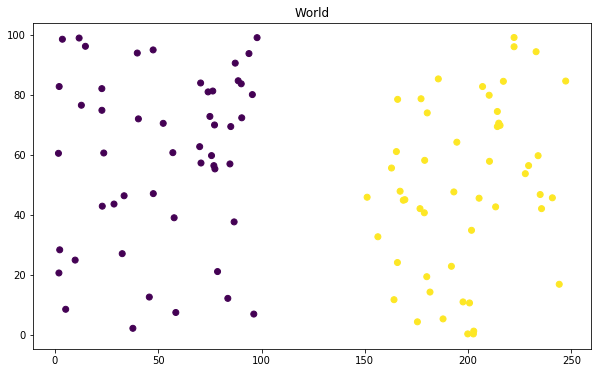

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('World')
ax.scatter(combined.x, combined.y, c=combined.region_id)

In [19]:
np.count_nonzero(combined.isna().values)

0

# Domestic Travel

In [93]:
combined = pd.merge(people, regions, on='region_name')

In [94]:
combined

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,84.088678,50.408570,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,75.051184,80.600960,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,61.712801,96.039100,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
3,5.0,USA,"[1.0, 0.0, 0.0]",USA,72.531468,61.362120,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
4,6.0,USA,"[1.0, 0.0, 0.0]",USA,81.950061,72.631365,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94.0,India,"[0.0, 0.0, 1.0]",India,219.562081,77.914810,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,168.805990,48.695892,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,233.016604,46.492898,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,175.482214,56.146064,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [95]:
move_idx = np.random.random((combined.shape[0], )) < combined['travel_dom']

In [96]:
travel_step = combined.loc[move_idx, 'domestic_travel_step'].values

In [97]:
move_x = (travel_step * np.random.normal(size=(combined.loc[move_idx, :].shape[0],))).reshape((-1, 1))
move_y = (travel_step * np.random.normal(size=(combined.loc[move_idx, :].shape[0],))).reshape((-1, 1))
move_xy = np.concatenate([move_x, move_y], axis=1)
combined.loc[move_idx, ['x', 'y']] += move_xy

In [98]:
combined

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,85.772081,51.830145,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,71.744531,78.860883,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,67.662921,103.907269,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
3,5.0,USA,"[1.0, 0.0, 0.0]",USA,75.127017,73.029289,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
4,6.0,USA,"[1.0, 0.0, 0.0]",USA,85.079765,79.457331,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94.0,India,"[0.0, 0.0, 1.0]",India,222.484268,74.294428,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,173.331620,41.136296,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,234.256460,50.912991,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,175.143608,59.792270,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [99]:
combined.loc[move_idx, 'x'] = combined.loc[move_idx, 'x'].clip(combined.loc[move_idx, 'xmin'], combined.loc[move_idx, 'xmax'])
combined.loc[move_idx, 'y'] = combined.loc[move_idx, 'y'].clip(combined.loc[move_idx, 'ymin'], combined.loc[move_idx, 'ymax'])

In [100]:
combined

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,85.772081,51.830145,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,71.744531,78.860883,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,67.662921,100.000000,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
3,5.0,USA,"[1.0, 0.0, 0.0]",USA,75.127017,73.029289,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
4,6.0,USA,"[1.0, 0.0, 0.0]",USA,85.079765,79.457331,1.0,0.0,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94.0,India,"[0.0, 0.0, 1.0]",India,222.484268,74.294428,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,173.331620,41.136296,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,234.256460,50.912991,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,175.143608,59.792270,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [101]:
people.loc[move_idx, :]

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,84.088678,50.408570,1.0,0.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,75.051184,80.600960,1.0,0.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,61.712801,96.039100,1.0,0.0
3,4.0,USA,"[1.0, 0.0, 0.0]",India,94.293269,57.329789,1.0,0.0
4,5.0,USA,"[1.0, 0.0, 0.0]",USA,72.531468,61.362120,1.0,0.0
...,...,...,...,...,...,...,...,...
95,96.0,India,"[0.0, 0.0, 1.0]",USA,80.041608,58.579731,1.0,0.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,168.805990,48.695892,1.0,0.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,233.016604,46.492898,1.0,0.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,175.482214,56.146064,1.0,0.0


In [102]:
people.loc[move_idx, ['x', 'y']] = combined.loc[move_idx, ['x', 'y']]

In [103]:
people

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection
0,1.0,USA,"[1.0, 0.0, 0.0]",USA,85.772081,51.830145,1.0,0.0
1,2.0,USA,"[1.0, 0.0, 0.0]",USA,71.744531,78.860883,1.0,0.0
2,3.0,USA,"[1.0, 0.0, 0.0]",USA,67.662921,100.000000,1.0,0.0
3,4.0,USA,"[1.0, 0.0, 0.0]",India,75.127017,73.029289,1.0,0.0
4,5.0,USA,"[1.0, 0.0, 0.0]",USA,85.079765,79.457331,1.0,0.0
...,...,...,...,...,...,...,...,...
95,96.0,India,"[0.0, 0.0, 1.0]",USA,222.484268,74.294428,1.0,0.0
96,97.0,India,"[0.0, 0.0, 1.0]",India,173.331620,41.136296,1.0,0.0
97,98.0,India,"[0.0, 0.0, 1.0]",India,234.256460,50.912991,1.0,0.0
98,99.0,India,"[0.0, 0.0, 1.0]",India,175.143608,59.792270,1.0,0.0


In [104]:
combined = pd.merge(people, regions, on='region_name')

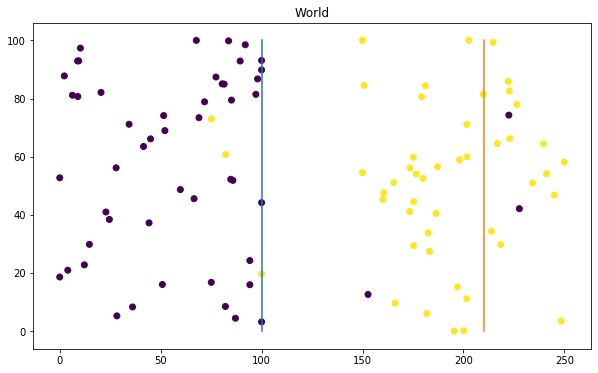

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('World')
ax.plot([100, 100], [0, 100])
ax.plot([210, 210], [0, 100])
ax.scatter(combined.x, combined.y, c=combined.region_id)

# International Travel

In [83]:
# join people and regions
combined = pd.merge(people, regions, on='region_name')

# get people who will move
move_idx = np.random.random((combined.shape[0], )) < combined['travel_int']

In [84]:
combined.loc[move_idx, :]

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
95,96.0,India,"[0.0, 0.0, 1.0]",India,150.0,28.344952,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [85]:
combined.loc[move_idx, 'region_name'] = combined.loc[move_idx, 'region_name'].apply(lambda region: regions[regions.region_name != region].region_name.sample(n=1).item())

In [86]:
combined.loc[move_idx, :]

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
95,96.0,India,"[0.0, 0.0, 1.0]",USA,150.0,28.344952,1.0,0.0,1,"[0.0, 0.0, 1.0]",1.0,0.01,0.0,150,250,0,100,1.0,0.2,5.0


In [87]:
movers_comb = combined.loc[move_idx, ['region_name', 'x', 'y']].merge(regions, on='region_name').set_index(combined.loc[move_idx, :].index)
movers_comb.loc[:, 'x'] = np.random.uniform(movers_comb.xmin, movers_comb.xmax)
movers_comb.loc[:, 'y'] = np.random.uniform(movers_comb.ymin, movers_comb.ymax)

In [88]:
movers_comb

,region_name,x,y,region_id,region_color,travel_dom,travel_int,quarantie,xmin,xmax,ymin,ymax,infection_radius,prob_of_spread,domestic_travel_step
95,USA,80.041608,58.579731,0,"[1.0, 0.0, 0.0]",1.0,0.01,0.0,0,100,0,100,1.0,0.2,5.0


In [89]:
people.loc[move_idx, ['x', 'y', 'region_name']] = movers_comb.loc[:, ['x', 'y', 'region_name']]

In [90]:
people.loc[move_idx, :]

,person_id,home_region_name,home_region_color,region_name,x,y,alive,infection
95,96.0,India,"[0.0, 0.0, 1.0]",USA,80.041608,58.579731,1.0,0.0


In [91]:
x = pd.DataFrame({'a': np.random.random((10,)), 'b': np.random.random((10,))})

In [92]:
x

,a,b
0,0.723490,0.315448
1,0.010483,0.495741
2,0.994959,0.437299
3,0.984759,0.127066
4,0.864000,0.695573
5,0.620116,0.170699
6,0.502893,0.636465
7,0.157566,0.740836
8,0.757257,0.868309
9,0.991162,0.140421


# Spread infection

In [431]:
people.loc[np.random.random((people.shape[0],)) > 0.9, 'infection'] = 0.1

In [432]:
people

,id,home_region,region_name,x,y,infection
0,1.0,USA,USA,10.680244,63.899467,0.0
1,2.0,USA,USA,42.791822,26.761918,0.0
2,3.0,USA,USA,15.532575,89.139100,0.0
3,4.0,USA,USA,97.727813,19.738456,0.0
4,5.0,USA,USA,93.446556,5.963908,0.0
...,...,...,...,...,...,...
145,146.0,Canada,Canada,311.927272,22.604164,0.0
146,147.0,Canada,Canada,302.328807,4.809695,0.0
147,148.0,Canada,Canada,239.578621,68.495269,0.1
148,149.0,Canada,Canada,230.414395,86.900355,0.0


In [438]:
Xdiff = (people.x[:, None] - people.x) ** 2
Ydiff = (people.y[:, None] - people.y) ** 2
distance = Xdiff + Ydiff

Exception: Data must be 1-dimensional

In [434]:
infected_mask = people.infection > 0.0
infected_dist = distance[infected_mask]

In [436]:
infected_dist.shape

(13, 150)

In [437]:
infected_dist

array([[8.07028243e+02, 4.94999732e+03, 7.32844532e+00, ...,
        5.05398926e+04, 4.60062233e+04, 5.73348295e+04],
       [2.36224758e+02, 4.01826116e+03, 1.93408646e+02, ...,
        5.44796795e+04, 5.02543348e+04, 6.16654203e+04],
       [2.03125104e+03, 1.87781689e+02, 4.57263529e+03, ...,
        4.61545702e+04, 4.44036625e+04, 5.30726970e+04],
       ...,
       [6.34497198e+04, 4.79602563e+04, 6.28985837e+04, ...,
        1.30559071e+03, 3.18832001e+03, 1.11336498e+03],
       [5.24155883e+04, 4.04667169e+04, 5.06227987e+04, ...,
        0.00000000e+00, 4.22730249e+02, 2.41798008e+02],
       [5.95866593e+04, 4.69588170e+04, 5.74519224e+04, ...,
        2.41798008e+02, 7.97733859e+02, 0.00000000e+00]])